<a href="https://colab.research.google.com/github/MaryAdewunmi/Sentiment-Analysis/blob/main/EndSARS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [1]:
from google.colab import files
uploaded = files.upload()

Saving EndSARS.xlsx to EndSARS.xlsx


In [4]:
import io
df1= pd.ExcelFile(io.BytesIO(uploaded['EndSARS.xlsx']))

In [6]:
print(df1.sheet_names)

['Hashtags', 'Sheet1']


In [10]:
df = df1.parse('Hashtags')

In [11]:
df.head()

,Status Id,Text
0,1326191559017159936,restructuring
1,1326055160959930112,changeinNigeria
2,1325917183608829952,hashtag
3,1325794637395709952,EndBadGovernanceinNIGERIA
4,1325794637395709952,EndSARS


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px


In [13]:

fig = px.histogram(df, x="Text")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='EndSARS_tweets')
fig.show()

In [19]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
from wordcloud import WordCloud #This line here



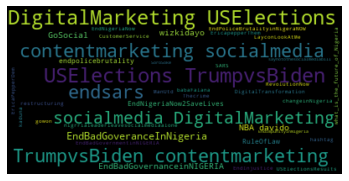

In [30]:
#Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.Text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud1.png')
plt.show()

In [2]:
# using sentiment analysis
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# remove score = 3
df = df[df['Text'] != 3]
df['sentiment'] = df['Text'].apply(lambda rating : +1 if rating > 3 else -1)

NameError: ignored

In [ ]:
# split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]